##  Le problème d’apprentissage
On a un  problème de classification ici

La reconnaissance d’image : une image en noir et blanc de 8*8 pixels contient 64 pixels, et est donc un objet de dimension 64. Il est ainsi courant de travailler dans des espaces de plusieurs milliers de dimensions.

### Chargement des bibliothèques :

In [1]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

#  on charge la librairie Pandas : un utilitaire facilitant la manipulation des données en format tabulaire.
import pandas as pd

# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

### Chargement du dataset digits

In [2]:
digits = datasets.load_digits()

### Exploration de données

#### Regardons ce que contient notre échantillon digits :

In [27]:
dir(digits)
# digits.keys()

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#  l'attribut digits.images
digits.images.shape

(1797, 8, 8)

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

les données de la première image 8x8. Chaque case dans le tableau correspond à un pixel, et la valeur dans cette case est la quantité de noir dans le pixel.

On affiche la première image. Attention ici digits.images[0] indique que l'on prend le premier élément de la matrice digits.images, il se trouve qu'ici le premier élément est un '0'.

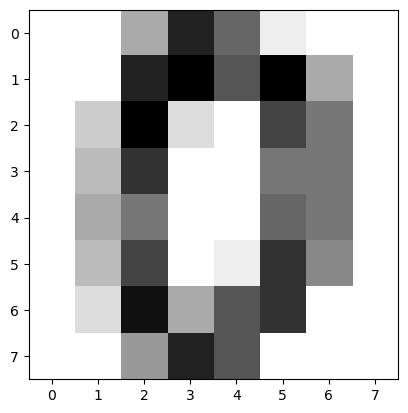

In [7]:
plt.imshow(digits.images[0],cmap='binary')

In [8]:
#  l'attribut digits.target
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


C'est un tableau à une dimension, avec 1797 cases. Il contient les étiquettes, c'est à dire les chiffres auxquels correspondent chaque image. Par exemple, la première étiquette est 0, et correspond à l'image ci-dessus.

In [30]:
dig = pd.DataFrame(digits['data'], columns = digits.feature_names)
dig

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


On remarque que notre DataFrame contient 64 colonnes (de 0 à 63). Ce qui représente l’ensemble des valeurs de la matrice de taille 8x8 encodant un chiffre du jeu digits sous sa forme image. 

#### Images et target sont tous deux des ndarrays (tableaux à N dimensions)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

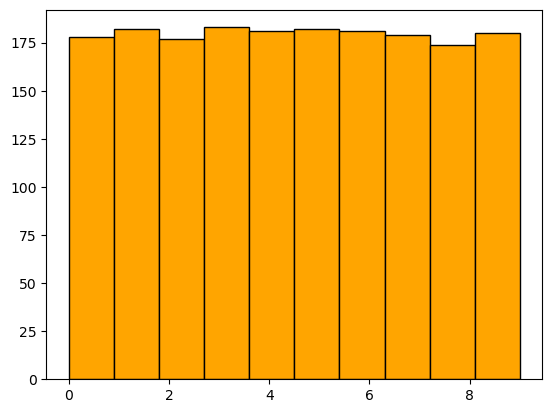

In [10]:
plt.hist(digits.target, edgecolor="black", color = "orange")

visualisons les 4 premiers échantillons de test et montrons leur valeur numérique prédite dans le titre.

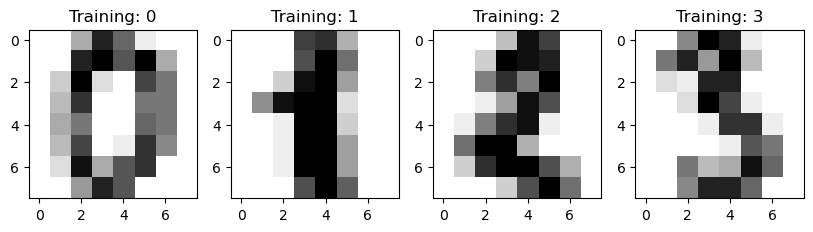

In [25]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    # ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [12]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


In [36]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Découpage du jeu de données
Lors de l’entrainement d’un algorithme de Machine Learning, la bonne pratique veut qu’on découpe notre jeu de données en jeu d’entrainement (Training Set) et jeu de test (Testing Set). Ainsi, nous pourrons tester les performances du modèle obtenu suite à l’entrainement de l’algorithme. Le test de performance se fait sur le testing Set qu’il n’a pas encore “vu”.

In [13]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

### Application de l’algorithme SVM et Entrainement
La fonction fit permet d’entraîner SVM, le premier argument étant les input features  qui correspond à l’encodage des chiffres en format matriciel. Le deuxième arguement indique pour chaque observation son étiquette (s’il s’agit du chiffre 5 ou 8 etc..).

In [14]:

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)


SVC(gamma=0.001)

### Prédictions et résultats

In [15]:

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

### Le score sur les données de test

In [40]:
# accuracy_score(y_test, predicted)

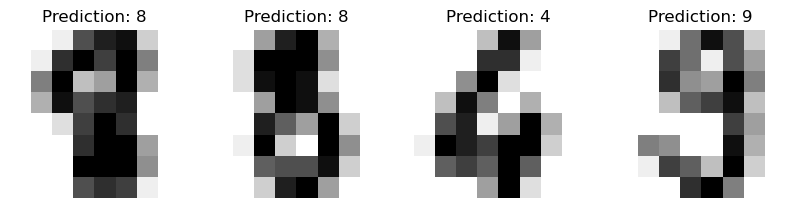

In [38]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [19]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [20]:
# %matplotlib inline
# import numpy as np
# test = np.array(digits['data'][1726])
# test1 = test.reshape(1,-1)
# displayImage(1726)

#### Matrice de confusion

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


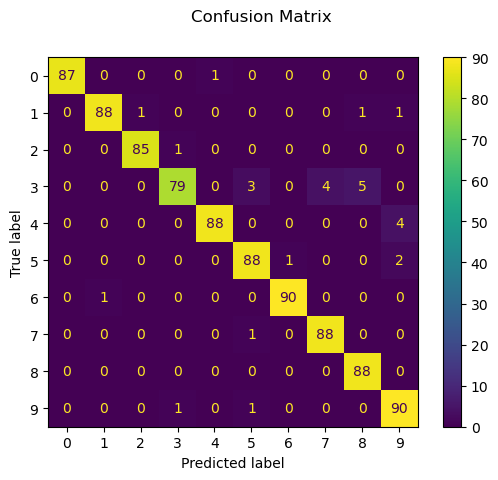

In [21]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [41]:
clf.score(X_test,y_test)

0.9688542825361512